In [1]:
import os
import sys
os.chdir('../')
new_current_dir = os.getcwd()  # get new current working directory
print("New current directory:", new_current_dir)
sys.path.append('./src/python/')

# import
from preamble.preamble import *
from gamma.gamma import GammaNPP
from gamma.rules import make_rules, Rules, readable_rules
from gamma.common import npp_from_json, set_of_frozenset
from plot.plot_function import *

New current directory: /home/fiftyfour/Documents/NetworkPricingGraphContraction


In [2]:
with open('./tmp/result_original.pkl', 'rb') as f:
    result = pickle.load(f)

In [3]:
print(*list(result.keys())[:10:], sep='\n')

d30-01
d30-02
d30-03
d30-04
d30-05
d30-06
d30-07
d30-08
d30-09
d30-10


In [9]:
cols_header = list(result['d30-01'].keys())
cols_header.remove('edge')
rows_header = list(result.keys())

meta_data = [
                [r[k] for k in cols_header] for r in result.values()
            ]
meta_data_df = pd.DataFrame(meta_data, index=rows_header,columns=cols_header)
meta_data_df['finish'] = meta_data_df['finish'].astype(bool)
meta_data_df['finish'] = meta_data_df['finish'].astype(int)

tmp = meta_data_df[(meta_data_df['finish']==1) & (meta_data_df['solve_time']<=float(1000))]
tmp

,obj_value,preprocess_time,solve_time,n_vertex,n_edge,n_tolled,compression_factors,rewind_optimal_1,rewind_time_1,rewind_optimal_2,...,finish,n,min_sl,max_sl,m,H1,H2,H3,H4,max_attemp
d30-01,124635.0,3.639586,270.820342,144,834,166,"{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 2.0, 6: 2....",124635,0.024431,124635,...,1,0,0,0,0,0,0,0,0,0
d30-02,102593.0,4.618838,96.781975,144,826,166,"{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 2.0, 6: 2....",61953,0.021636,61953,...,1,0,0,0,0,0,0,0,0,0
d30-03,104623.0,1.929523,32.827195,144,830,166,"{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 2.0, 6: 2....",104623,0.022459,104623,...,1,0,0,0,0,0,0,0,0,0
d30-05,103506.0,3.898145,564.512347,144,828,166,"{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 2.0, 6: 2....",103506,0.024230,103506,...,1,0,0,0,0,0,0,0,0,0
d30-06,94016.0,3.512235,671.717820,144,834,166,"{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 2.0, 6: 2....",76878,0.022394,76878,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v35-02,149081.0,0.915649,157.773910,144,414,82,"{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 2.0, 6: 2....",149081,0.018463,149081,...,1,0,0,0,0,0,0,0,0,0
v40-01,276048.0,2.437368,906.605352,144,408,82,"{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 2.0, 6: 2....",276048,0.020319,276048,...,1,0,0,0,0,0,0,0,0,0
v40-02,181158.0,0.807989,289.989790,144,416,84,"{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 2.0, 6: 2....",181158,0.018462,181158,...,1,0,0,0,0,0,0,0,0,0
v45-01,467758.0,1.709193,712.744316,144,410,82,"{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 2.0, 6: 2....",467758,0.023669,467758,...,1,0,0,0,0,0,0,0,0,0


In [37]:
# Creating a config for the server
config = {}
for pb_name, row in tmp.iterrows():
    sh_time_limit = int(round(row['solve_time'] + 100,0)) # sec
    config[pb_name] = sh_time_limit

with open('./result/time_limit_config.pkl', 'wb') as f:
    pickle.dump(config, f)

./src/sh/000001-000100-d30-01.sh
#!/bin/bash
#SBATCH --cpus-per-task=1
#SBATCH --mem=5G
#SBATCH --time=10:26:00
#SBATCH --output=/dev/null
#SBATCH --partition=optimum
module load julia
module load gurobi
julia src/julia/script.jl ./data/generated/problems/paper/d30-01/000001-000100-d30-01-P.pkl ./data/generated/problems/paper/d30-01/000001-000100-d30-01-R.json 371
sleep 60


./src/sh/000002-000101-d30-01.sh
#!/bin/bash
#SBATCH --cpus-per-task=1
#SBATCH --mem=5G
#SBATCH --time=10:32:00
#SBATCH --output=/dev/null
#SBATCH --partition=optimum
module load julia
module load gurobi
julia src/julia/script.jl ./data/generated/problems/paper/d30-01/000002-000101-d30-01-P.pkl ./data/generated/problems/paper/d30-01/000002-000101-d30-01-R.json 371
sleep 60


./src/sh/000003-000101-d30-01.sh
#!/bin/bash
#SBATCH --cpus-per-task=1
#SBATCH --mem=5G
#SBATCH --time=10:32:00
#SBATCH --output=/dev/null
#SBATCH --partition=optimum
module load julia
module load gurobi
julia src/julia/script.jl ./data/generated/problems/paper/d30-01/000003-000101-d30-01-P.pkl ./data/generated/problems/paper/d30-01/000003-000101-d30-01-R.json 371
sleep 60


./src/sh/000004-000101-d30-01.sh
#!/bin/bash
#SBATCH --cpus-per-task=1
#SBATCH --mem=5G
#SBATCH --time=10:32:00
#SBATCH --output=/dev/null
#SBATCH --partition=optimum
module load julia
module load gurobi
julia src/julia/script.jl ./data/generated/problems/paper/d30-01/000004-000101-d30-01-P.pkl ./data/generated/problems/paper/d30-01/000004-000101-d30-01-R.json 371
sleep 60


./src/sh/000005-000101-d30-01.sh
#!/bin/bash
#SBATCH --cpus-per-task=1
#SBATCH --mem=5G
#SBATCH --time=10:32:00
#SBATCH --output=/dev/null
#SBATCH --partition=optimum
module load julia
module load gurobi
julia src/julia/script.jl ./data/generated/problems/paper/d30-01/000005-000101-d30-01-P.pkl ./data/generated/problems/paper/d30-01/000005-000101-d30-01-R.json 371
sleep 60


./src/sh/000006-000101-d30-01.sh
#!/bin/bash
#SBATCH --cpus-per-task=1
#SBATCH --mem=5G
#SBATCH --time=10:32:00
#SBATCH --output=/dev/null
#SBATCH --partition=optimum
module load julia
module load gurobi
julia src/julia/script.jl ./data/generated/problems/paper/d30-01/000006-000101-d30-01-P.pkl ./data/generated/problems/paper/d30-01/000006-000101-d30-01-R.json 371
sleep 60


./src/sh/000007-000101-d30-01.sh
#!/bin/bash
#SBATCH --cpus-per-task=1
#SBATCH --mem=5G
#SBATCH --time=10:32:00
#SBATCH --output=/dev/null
#SBATCH --partition=optimum
module load julia
module load gurobi
julia src/julia/script.jl ./data/generated/problems/paper/d30-01/000007-000101-d30-01-P.pkl ./data/generated/problems/paper/d30-01/000007-000101-d30-01-R.json 371
sleep 60


./src/sh/000008-000101-d30-01.sh
#!/bin/bash
#SBATCH --cpus-per-task=1
#SBATCH --mem=5G
#SBATCH --time=10:32:00
#SBATCH --output=/dev/null
#SBATCH --partition=optimum
module load julia
module load gurobi
julia src/julia/script.jl ./data/generated/problems/paper/d30-01/000008-000101-d30-01-P.pkl ./data/generated/problems/paper/d30-01/000008-000101-d30-01-R.json 371
sleep 60


./src/sh/000009-000101-d30-01.sh
#!/bin/bash
#SBATCH --cpus-per-task=1
#SBATCH --mem=5G
#SBATCH --time=10:32:00
#SBATCH --output=/dev/null
#SBATCH --partition=optimum
module load julia
module load gurobi
julia src/julia/script.jl ./data/generated/problems/paper/d30-01/000009-000101-d30-01-P.pkl ./data/generated/problems/paper/d30-01/000009-000101-d30-01-R.json 371
sleep 60


In [46]:

directory_npp = './data/generated/problems/paper/v50-10'
directory_sh = './src/sh/'

independant = True
h, m, s = '15', '00', '00'
cpu, ram = 1, 5
time_limit = 500



    
sh_command_list = []
for root, dirs, files in os.walk(directory_npp):
    for filename in files:
        if filename.endswith("P.json") or filename.endswith("P.pkl"):
            _, ext = os.path.splitext(filename)
            
            input_file = os.path.join(root, filename)
            output_file = os.path.join(directory_npp, filename.replace(f'P{ext}', 'R.json'))
            
            command = f'julia src/julia/script.jl {input_file} {output_file} {time_limit}'
            
            if independant:
                sh_file = os.path.join(directory_sh, filename.replace(f'-P{ext}', '.sh'))
                
                if filename.endswith("P.json"):
                    h, m , s = '%02d' % (time_limit // 3600), '%02d' % ((time_limit % 3600) // 60), '00'
                
                else:
                    h, m, s = '15', '00', '00'
                    
                with open(sh_file, 'w') as f:
                    f.write('\n'.join(preamble(cpu, ram, h, m, s)))
                    f.write('\n'+command)
                    f.write('\nsleep 60')
                    
                sh_command_list.append(f'sbatch {sh_file}')
            else:   
                sh_command_list.append(command)
                

sh_command_list.append('sleep 60')
sh_file = os.path.join(directory_sh, f"{directory_npp.split(os.sep)[-1]}.sh")

h, m, s = '00', '05', '00'
cpu, ram = 1, 1
with open(sh_file, 'w') as f:
    f.write('\n'.join(preamble(cpu, ram, h, m, s)))
    f.write('\n')
    f.write('\n'.join(sh_command_list))

In [5]:








# data on one problem
with open('./tmp/result_test_v50-10.pkl', 'rb') as f:
    result = pickle.load(f)
    
problem_name = 'v50-10'
rows_header = list(map(lambda x: x[0], result[f'000000-000000-0-0-0-0-0-0-0-0-0-{problem_name}']['edge']))
cols_header = list(result.keys())
edge_value_data = [      
                    [ r['edge'][i][2] for r in result.values() ] 
                    for i,_ in enumerate(rows_header)   
                ]

flow_value_data = [      
                    [ r['edge'][i][3] for r in result.values() ] 
                    for i,_ in enumerate(rows_header)   
                ]
# Table of the form
#  edge v1 v2 v3 v4 ....
#   e1  o11
#   e2  o21
#   e3  ...
# ....
edge_value_df = pd.DataFrame(edge_value_data, index = rows_header, columns=cols_header)
flow_value_df = pd.DataFrame(flow_value_data, index = rows_header, columns=cols_header)


## meta_data
# df of the form
#  pb v1 v2 v3 v4 ....
#   p1  o11
#   p2  o21
#   p3  ...
# ....

cols_header = list(result[f'000000-000000-0-0-0-0-0-0-0-0-0-{problem_name}'].keys())
cols_header.remove('edge')
rows_header = list(result.keys())

meta_data = [
                [r[k] for k in cols_header] for r in result.values()
            ]
meta_data_df = pd.DataFrame(meta_data, index=rows_header,columns=cols_header)

In [6]:
edge_value_df
flow_value_df
meta_data_df

,obj_value,preprocess_time,solve_time,n_vertex,n_edge,compression_factors,rewind_optimal_1,rewind_time_1,rewind_optimal_2,rewind_time_2,n,min_sl,max_sl,m,H1,H2,H3,H4,max_attemp
000000-000000-0-0-0-0-0-0-0-0-0-v50-10,252500.000000,2.474829,501.875847,414,144,"{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 2.0, 6: 2....",255932,0.021786,255932,0.022335,0,0,0,0,0,0,0,0,0
000209-50-2-2-2-1-1-1-0-1500-v50-10,221583.000000,0.899084,501.402943,412,141,"{1: 1.0048543689320388, 2: 1.0212765957446808,...",182603,0.021965,182603,0.020656,50,2,2,2,1,1,1,0,1500
000692-50-2-0-0-1-1-1-0-1500-v50-10,292747.000000,2.267659,500.430037,413,142,"{1: 1.0024213075060533, 2: 1.0140845070422535,...",272893,0.021684,272893,0.021666,50,2,0,0,1,1,1,0,1500
000386-50-2-2-7-1-1-1-0-1500-v50-10,276356.000000,1.102128,500.222709,412,140,"{1: 1.0048543689320388, 2: 1.0285714285714285,...",223391,0.020829,223391,0.020416,50,2,2,7,1,1,1,0,1500
000427-50-2-2-7-1-1-1-0-1500-v50-10,193671.000247,0.160148,364.404126,411,138,"{1: 1.0072992700729928, 2: 1.0434782608695652,...",124992,0.019282,124992,0.019324,50,2,2,7,1,1,1,0,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000235-50-2-2-2-1-1-1-0-1500-v50-10,250896.000000,0.410281,500.287969,412,140,"{1: 1.0048543689320388, 2: 1.0285714285714285,...",158979,0.020243,133404,0.019753,50,2,2,2,1,1,1,0,1500
000460-50-3-3-3-1-1-1-0-1500-v50-10,188899.000000,0.245629,500.258313,412,140,"{1: 1.0048543689320388, 2: 1.0285714285714285,...",141484,0.020133,141484,0.020557,50,3,3,3,1,1,1,0,1500
000226-50-2-2-2-1-1-1-0-1500-v50-10,206148.000000,0.363614,500.213999,412,140,"{1: 1.0048543689320388, 2: 1.0285714285714285,...",151313,0.020295,151313,0.020266,50,2,2,2,1,1,1,0,1500
000641-50-2-5-0-1-1-1-0-1500-v50-10,189156.000181,0.199460,500.267879,412,140,"{1: 1.0048543689320388, 2: 1.0285714285714285,...",125471,0.020182,125471,0.020179,50,2,5,0,1,1,1,0,1500


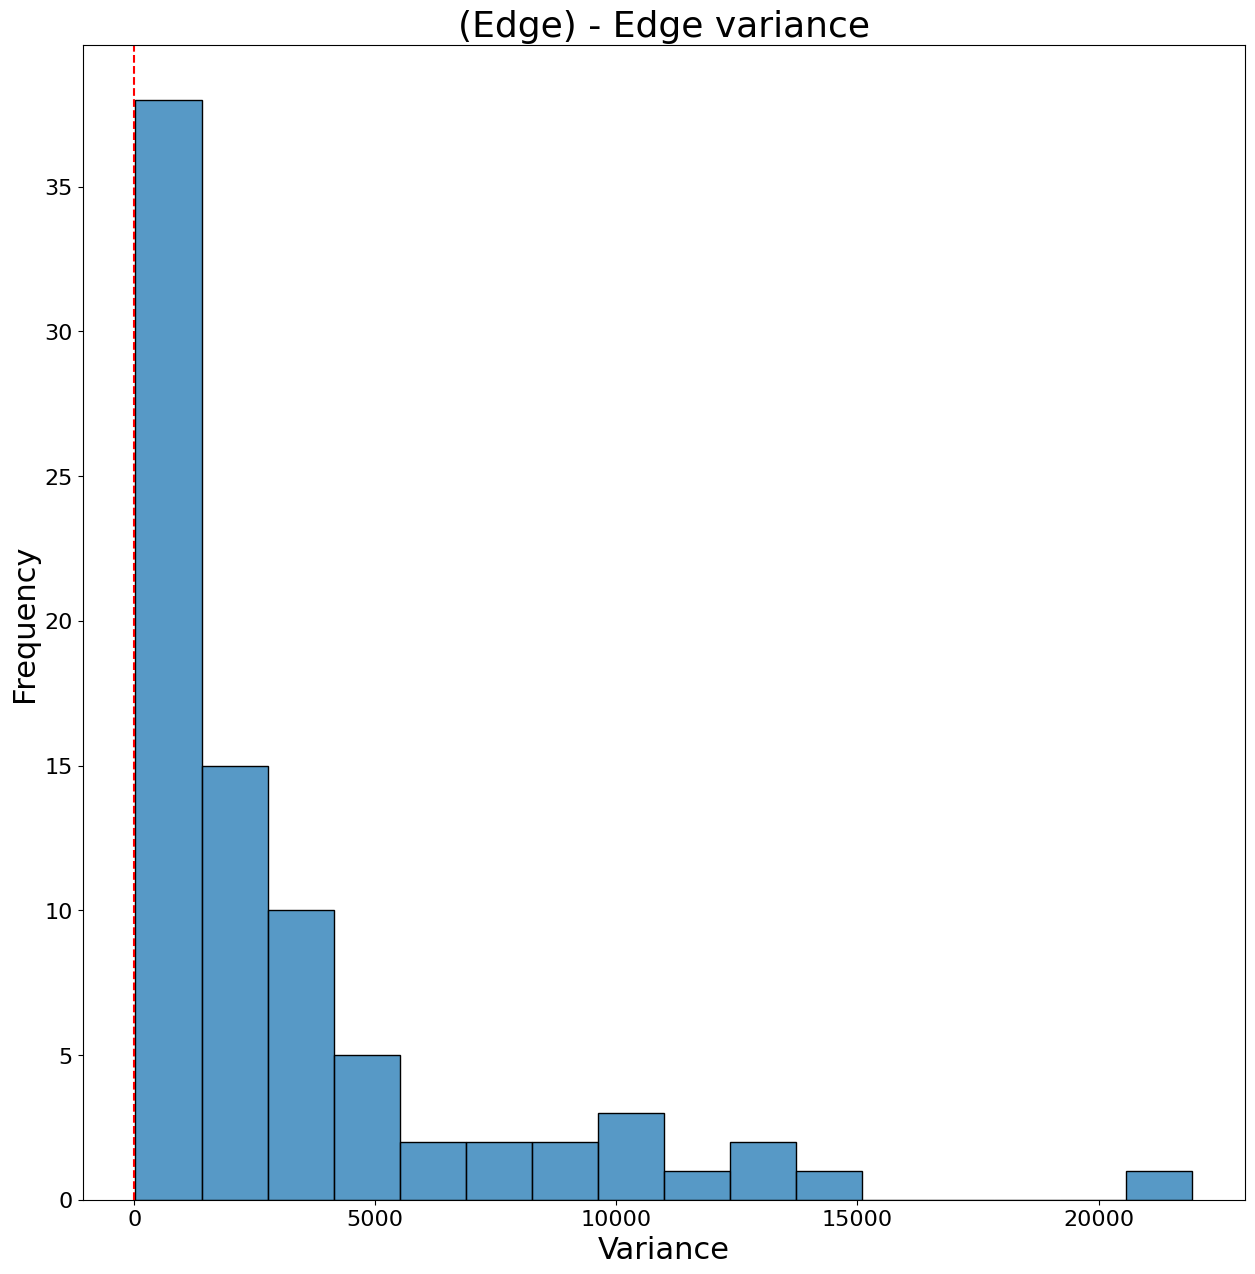

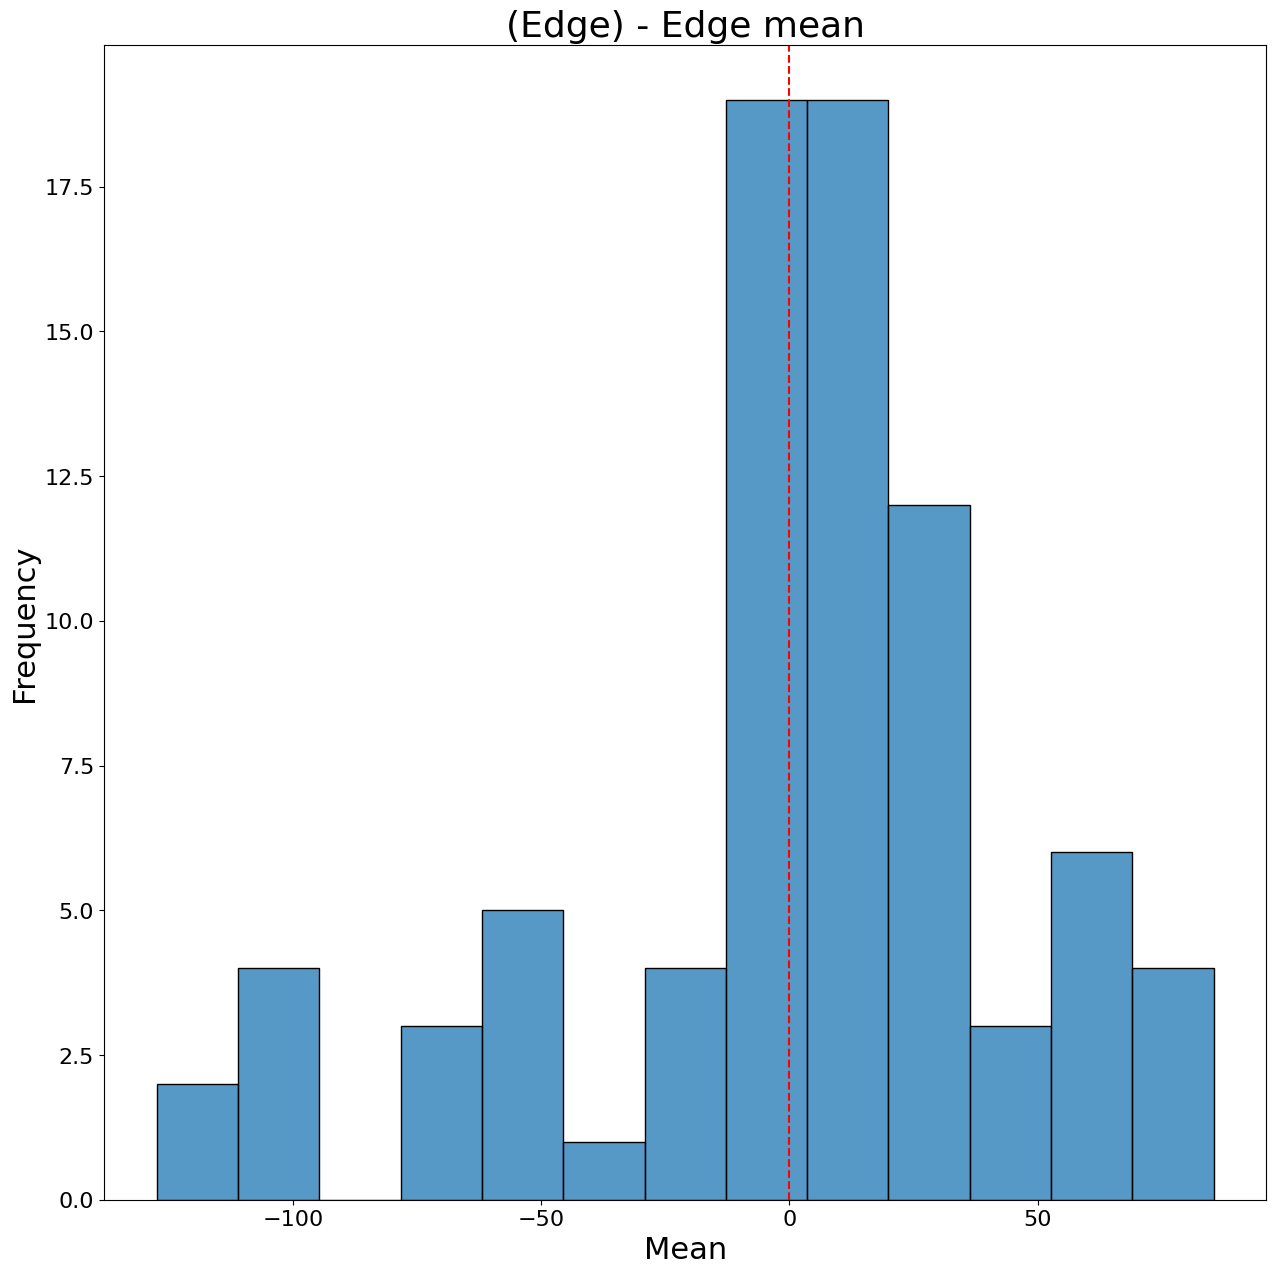

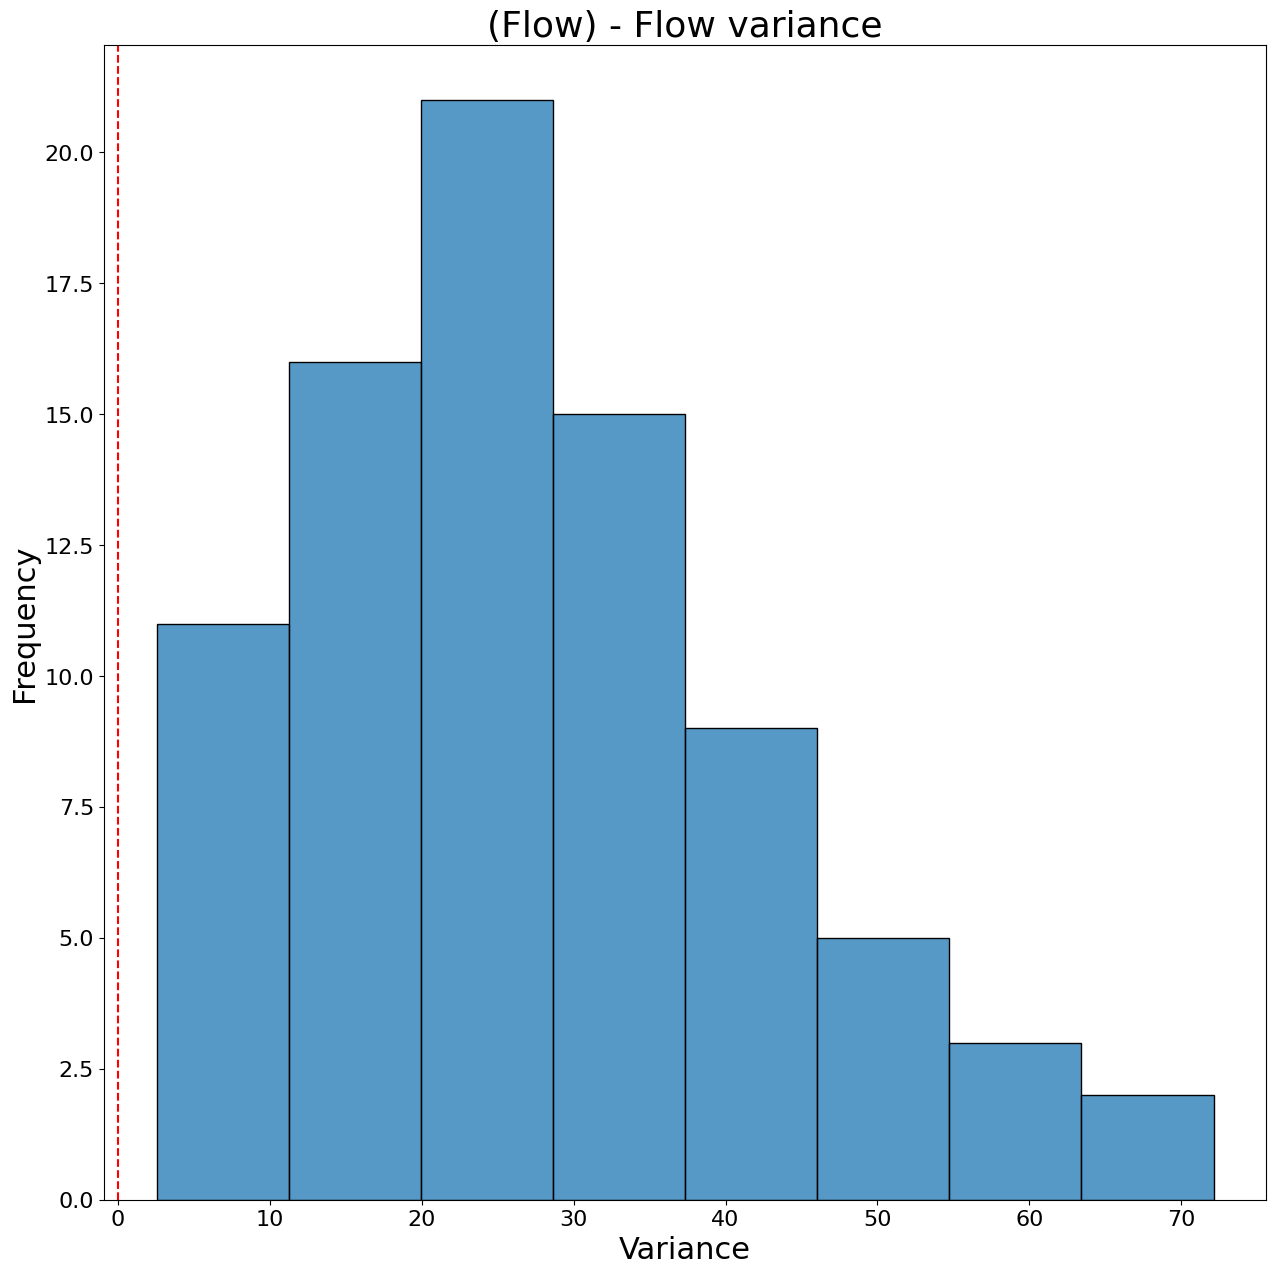

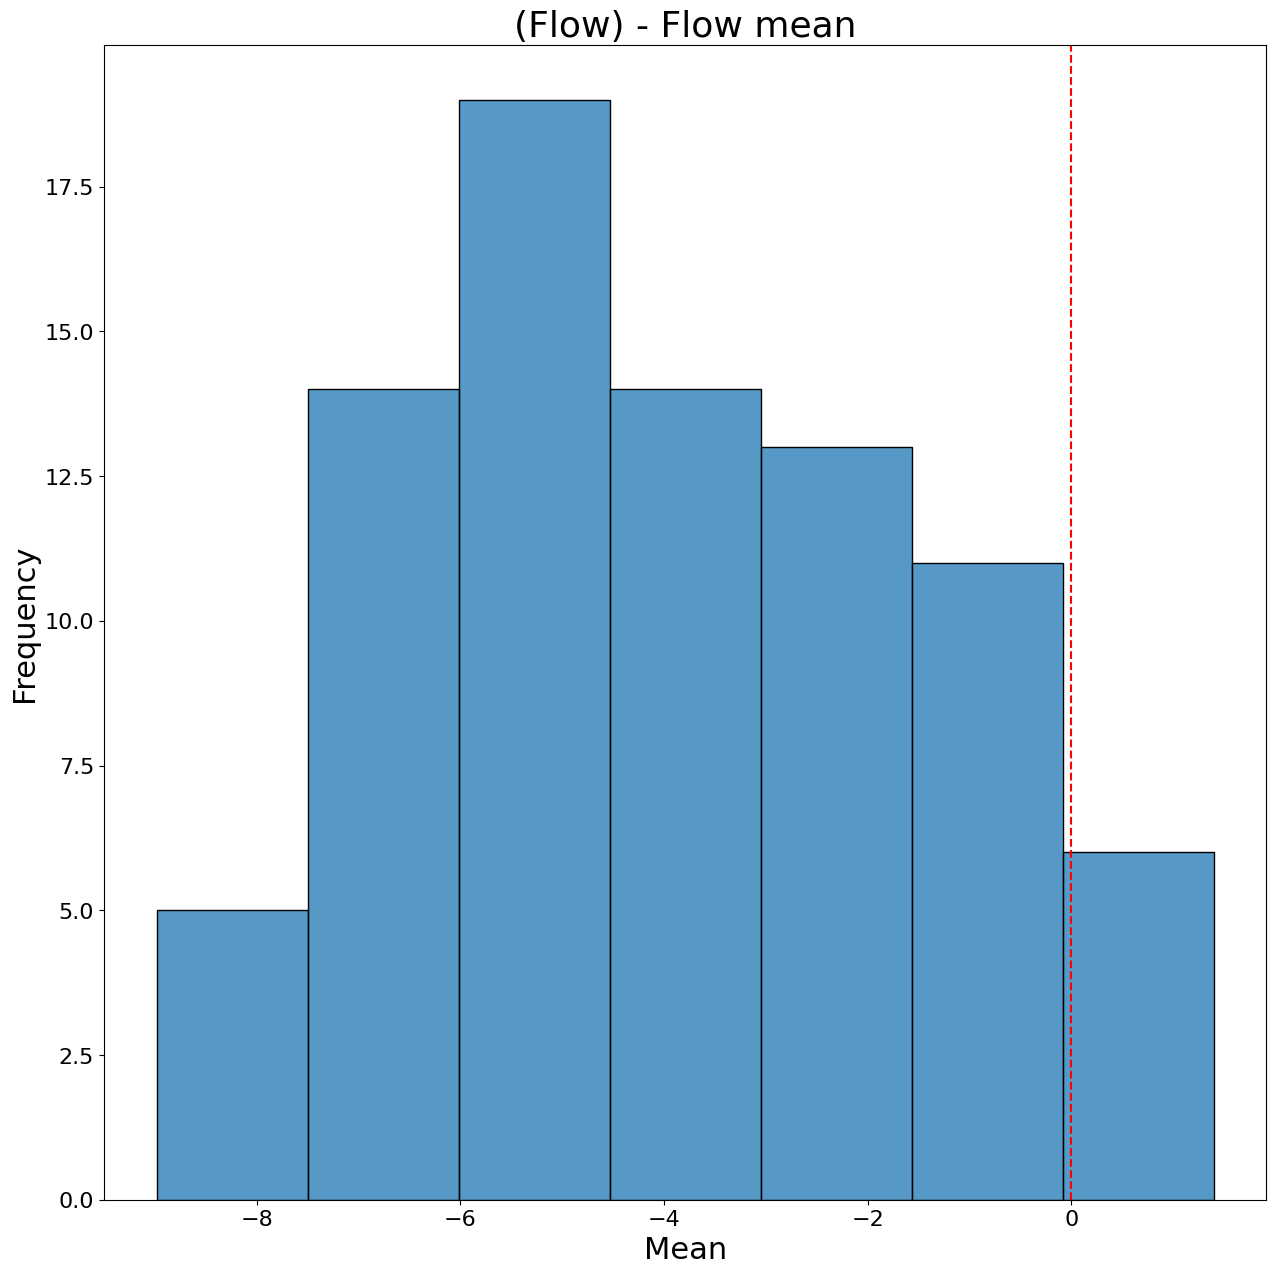

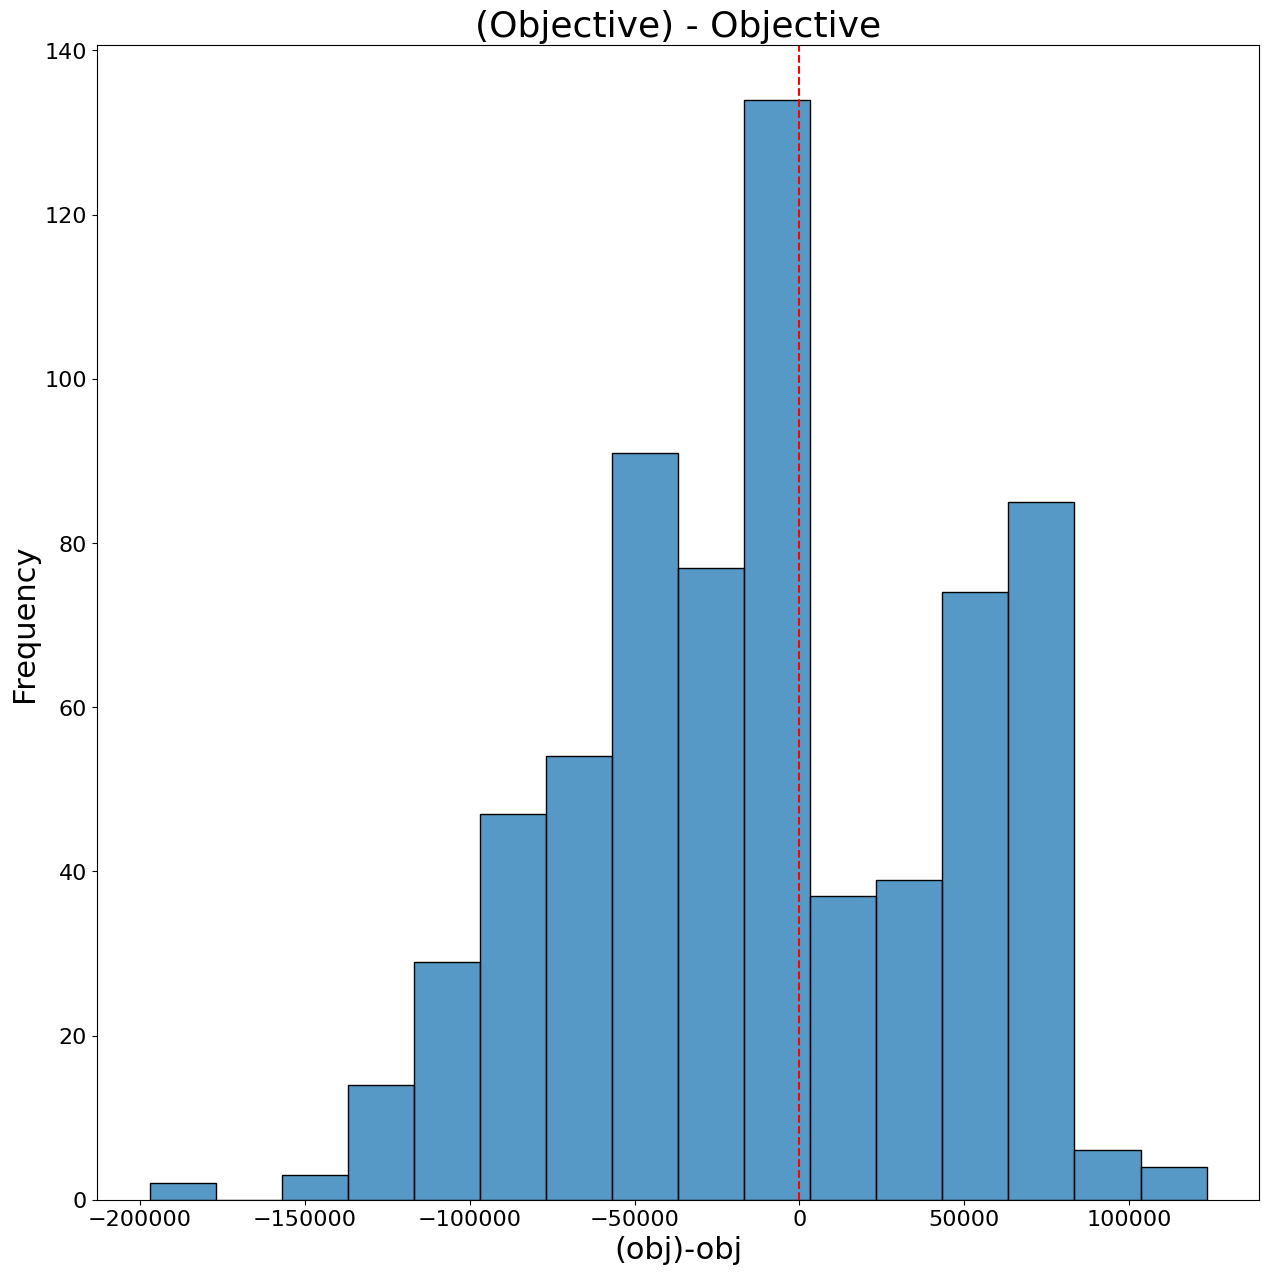

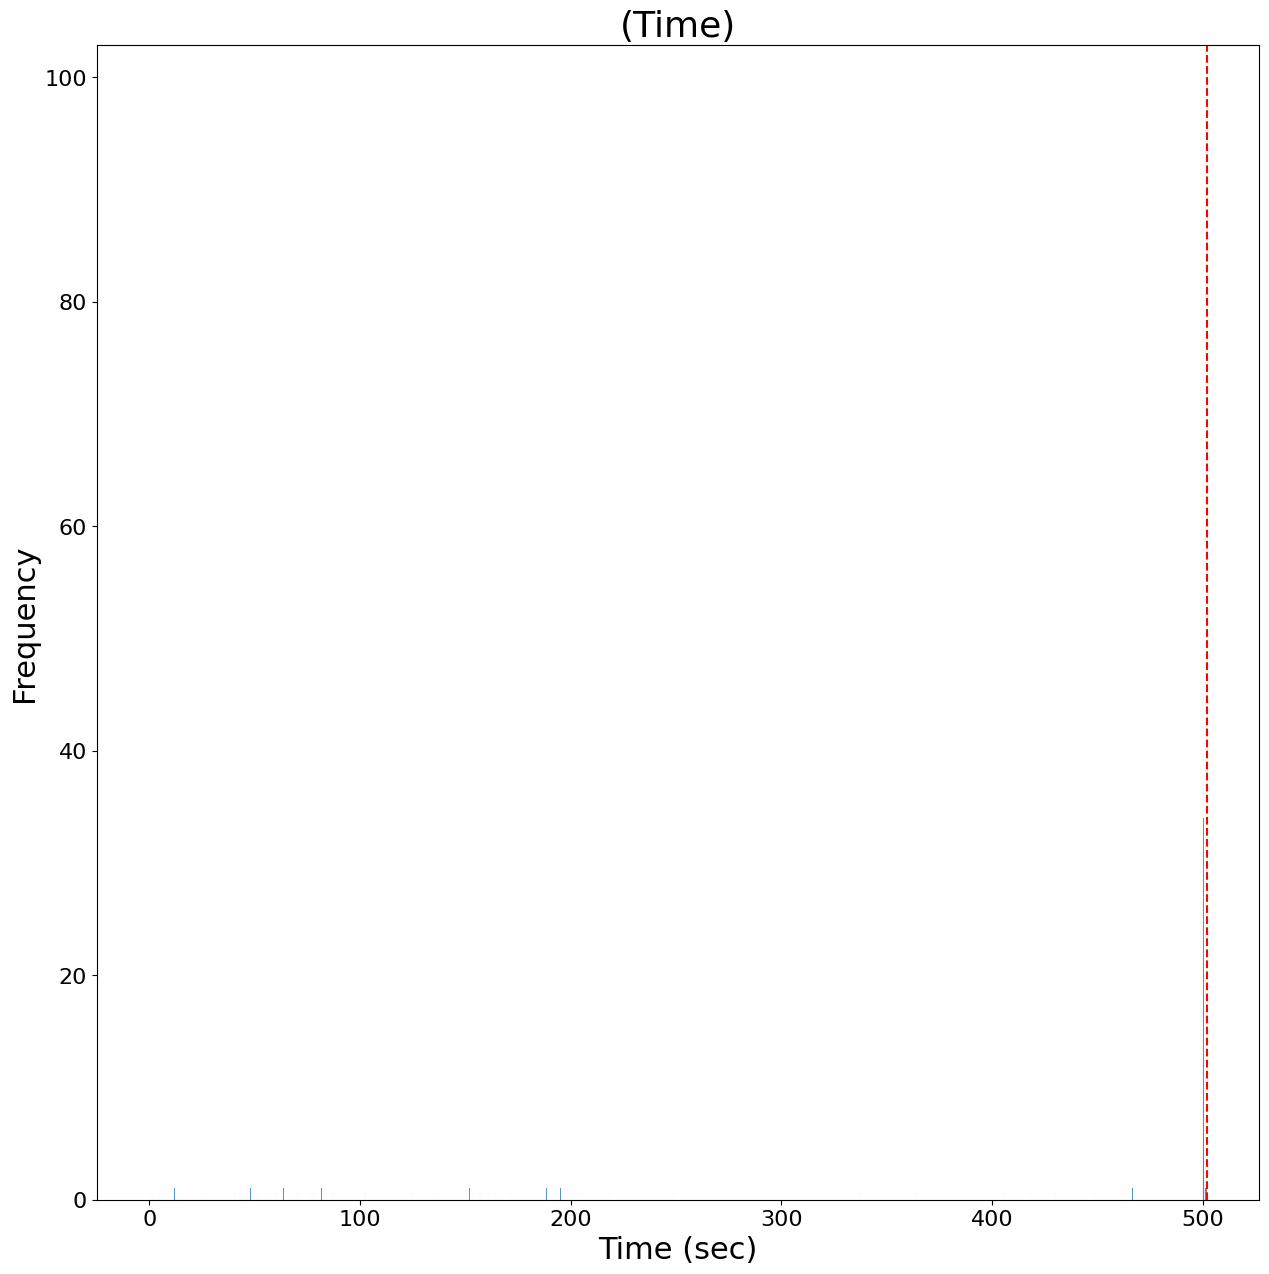

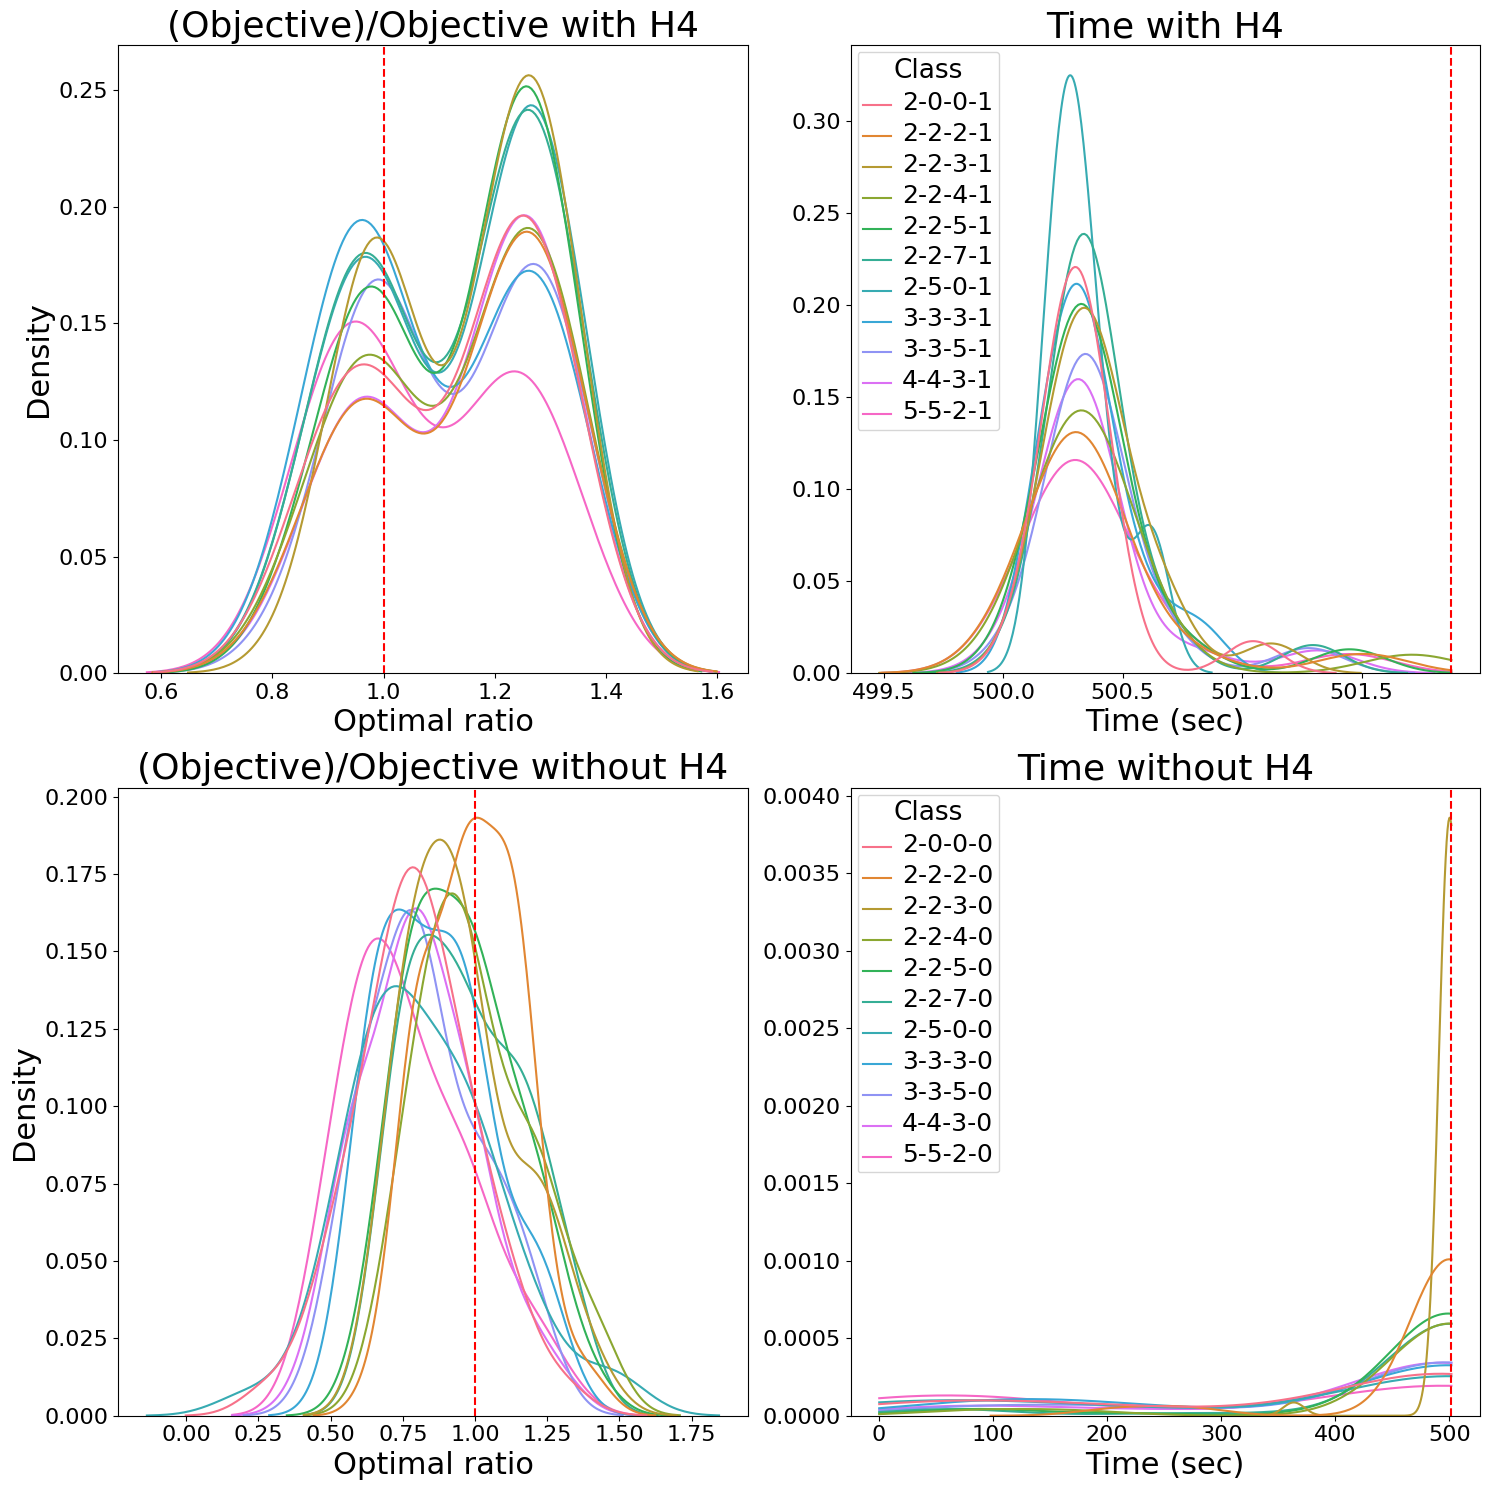

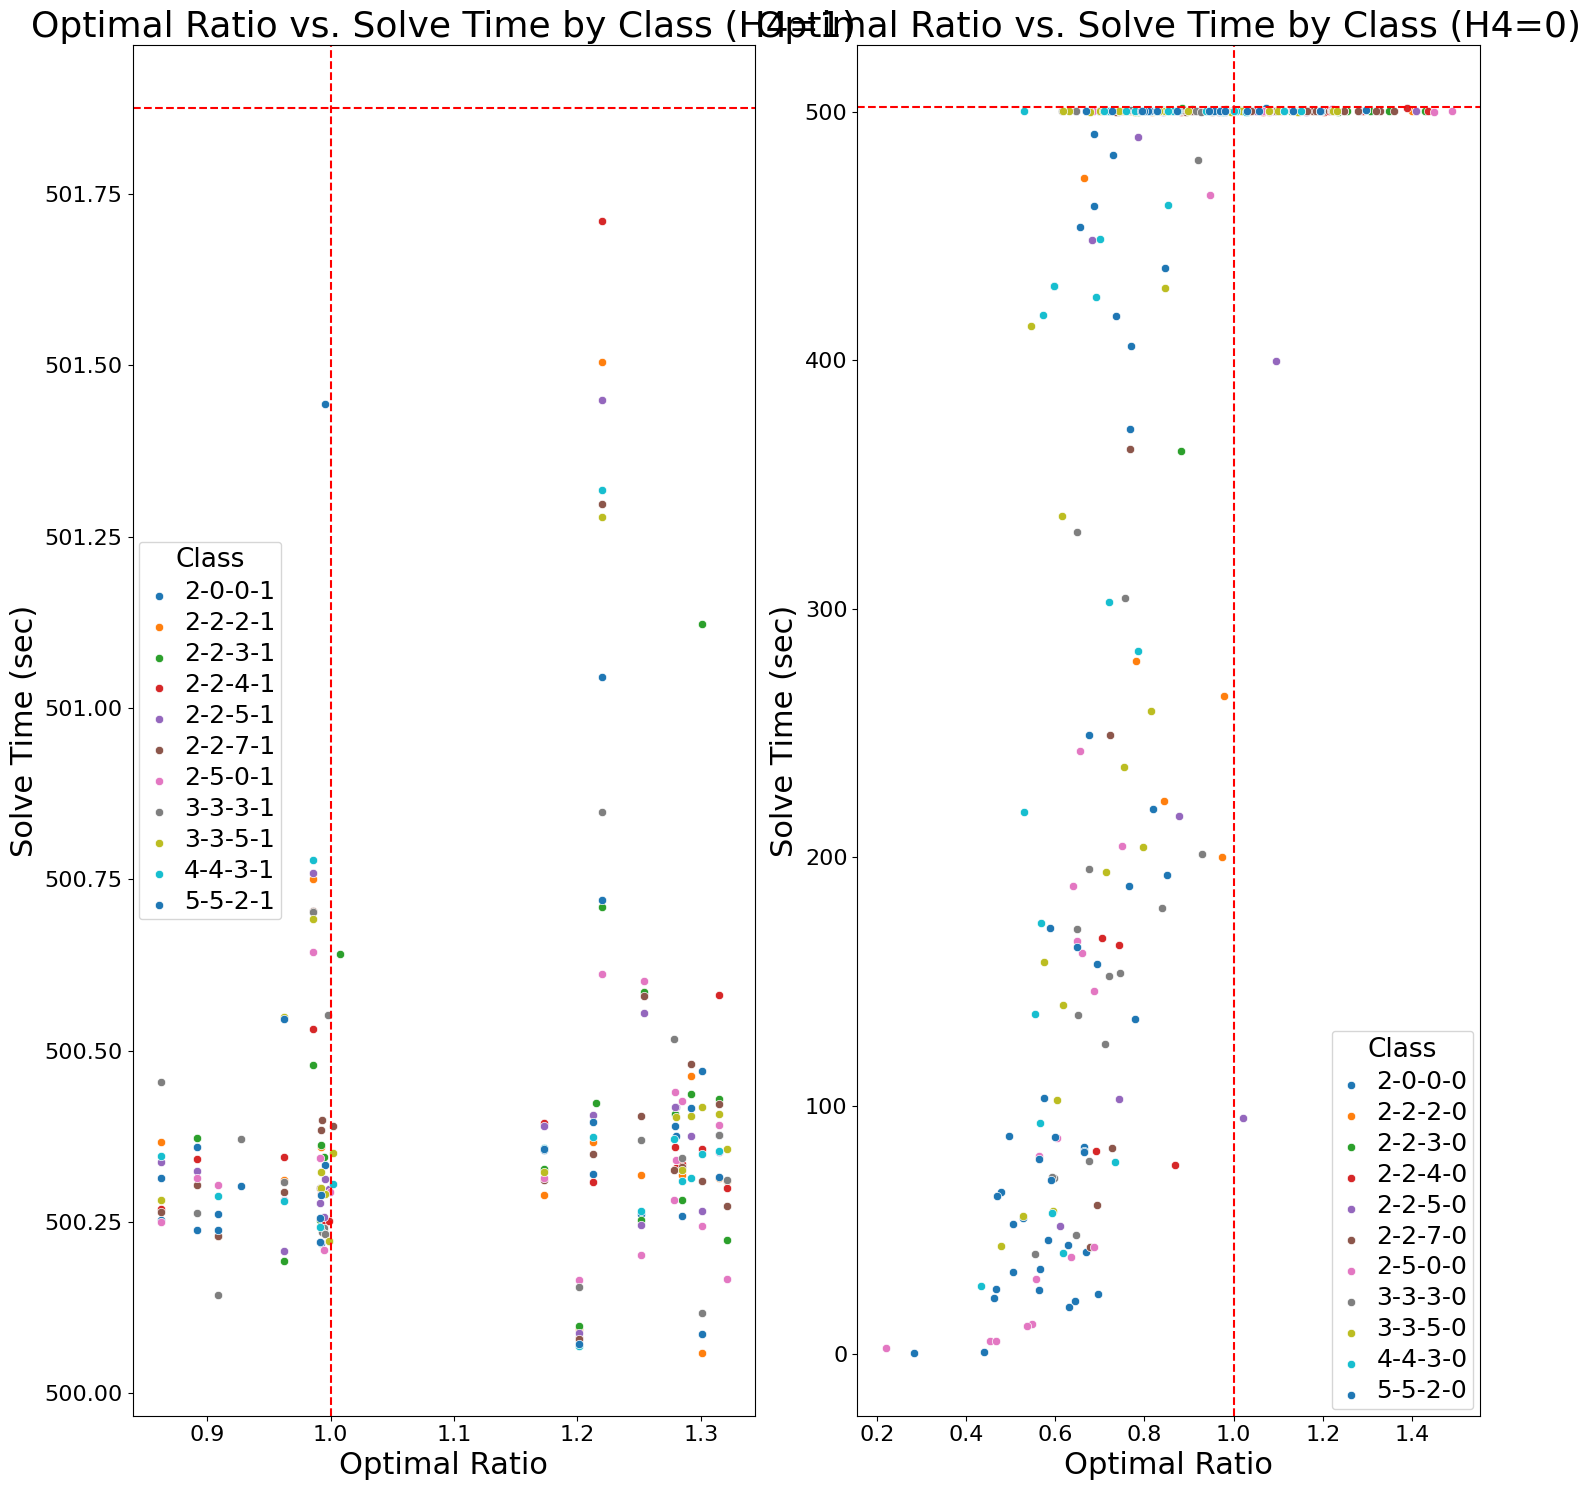

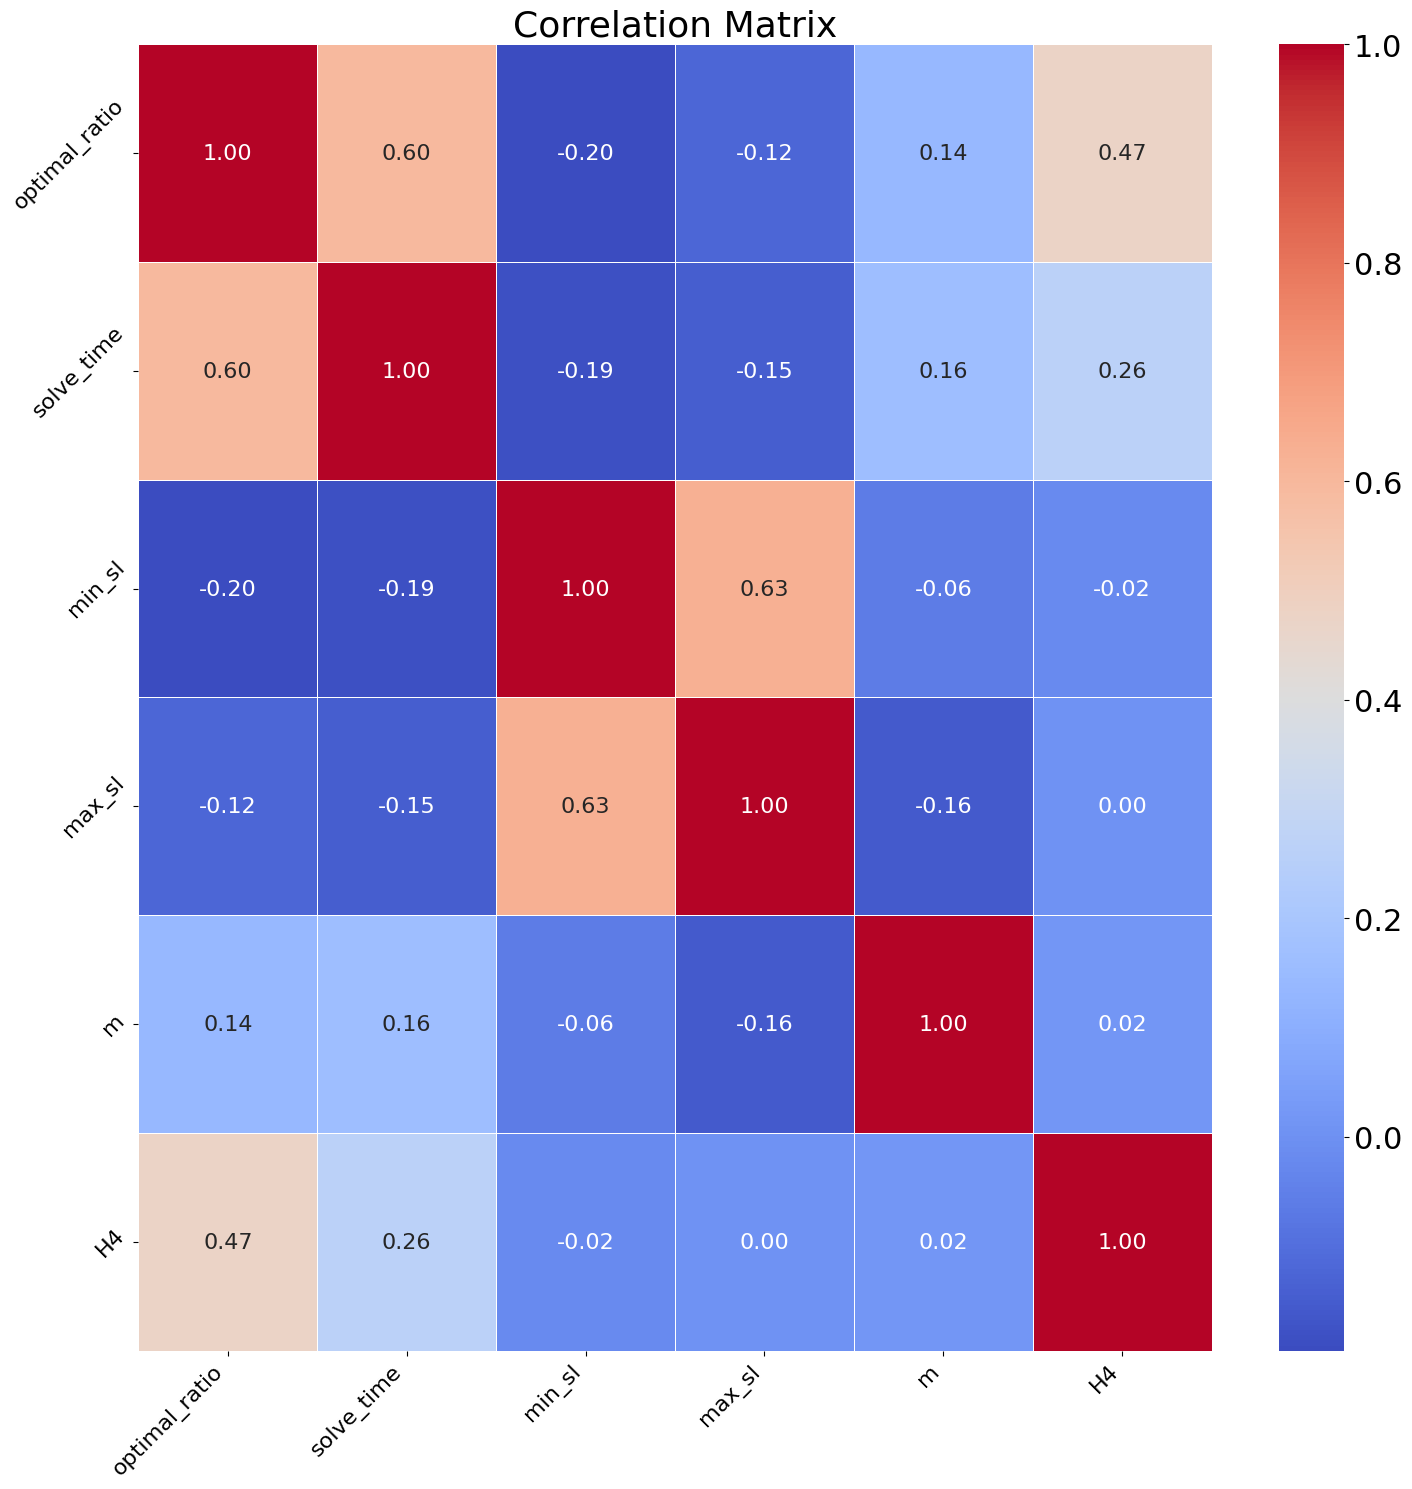

In [7]:
problem_name = 'v50-10'
plot_kwargs = {
                'ticks_font_size':16,
               'label_font_size':22,
               'title_font_size':26,
               'legend_font_size':18,
               'fig_x_size':15,
               'fig_y_size':15,
              }

p = edge_edge_variance_histplot(edge_value_df,problem_name,**plot_kwargs)
plt.show()
p = edge_edge_mean_histplot(edge_value_df,problem_name,**plot_kwargs)
plt.show()
p = flow_flow_variance_histplot(flow_value_df,problem_name,**plot_kwargs)
plt.show()
p = flow_flow_mean_histplot(flow_value_df,problem_name,**plot_kwargs)
plt.show()
p = objective_objective_histplot(meta_data_df,problem_name,**plot_kwargs)
plt.show()
p = time_histplot(meta_data_df,problem_name,**plot_kwargs)
plt.show()
p=advance_plots(meta_data_df, problem_name, **plot_kwargs)
plt.show()
p=optimal_ratio_vs_time(meta_data_df, problem_name, **plot_kwargs)
plt.show()
p=correlation_matrix(meta_data_df, problem_name, **plot_kwargs)
plt.show()